# **<center>UNIVERSIDADE DE FORTALEZA</center>**
**<center>PÓS GRADUAÇÃO - MBA EM CIÊNCIA DE DADOS</center>**
___

Prof. PhD Ernerson A. Oliveira

Aluno: Diego Teixeira

Matrícula: 1924526



**<center>TRABALHO DE ANÁLISE DE DADOS UTILIZANDO PANDAS, NLTK E MATPLOTLIB</center>**
---


**1 - CONTEXTUALIZAÇÃO**

O trabalho visa extrair informações dos twitters do presidente Jair Bolsonaro e do ex-presidente Lula, utilizando os módulos específicos para análise de dados em python.

**2 - METODOLOGIA**

Os dados primários estão no formato JSON que posteriormente serão tranformados em DataFrames e passarão por alguns métodos do Pandas, a fim de filtrá-los e agrupá-los. Num primeiro momento, será mostrado uma tabela com algumas informações das bases de dados. Em seguida, serão feitos recortes nas colunas, bem como o acréscimo de outras para facilitar as análises temporais em ano e mês. Por fim, os dados extraídos serão mostrados em gráficos para análise visual de alguns insights obtidos.

**3 - EXPLORAÇÃO DOS DADOS**

**Importando os Módulos**

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

**Carregando os dados** 

In [2]:
df_bo = pd.read_json('jairbolsonaro.json')
df_lu = pd.read_json('LulaOficial.json')

**Visualizando os dados do Bolsonaro**

In [126]:
df_bo.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2010-04-01 02:59:50+00:00,11402700435,11402700435,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,15,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-10 11:02:23+00:00,1083318129135112192,1083318129135112192,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...",False,"[0, 90]","{'hashtags': [{'text': 'tbt', 'indices': [12, ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,31618,False,False,pt,"{'media': [{'id': 1083318121841262592, 'id_str...",0.0,NaN,NaN,NaN,NaN
2,2019-07-19 02:04:16+00:00,1152036400138579968,1152036400138579968,- Para descontrair. Proibido queimar ovo. (Kkk...,False,"[0, 48]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,46637,False,False,pt,"{'media': [{'id': 1152036204247953408, 'id_str...",0.0,NaN,NaN,NaN,NaN


**Visualizando os dados do Lula**

In [127]:
df_lu.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2018-08-17 16:23:04+00:00,1030490201460801541,1030490201460801536,"""O presidente Lula vai dar um passeio nessa el...",False,"[0, 212]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,347,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-16 01:53:02+00:00,511694215735422976,511694215735422976,@dilmabr afirma que aqueles que querem acabar ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,9,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-08 23:23:49+00:00,895063025996242944,895063025996242944,O PT deu cidadania para as mulheres fazerem po...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,203,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


**Extraindo e tabelando informações**

In [128]:
# Calculando quantidade de valores nulos no DataFrame
A = df_lu.isnull().sum()
B = df_bo.isnull().sum()
countNull_Lula = 0
countNull_Bols = 0
for i in range(A.shape[0]):
    countNull_Lula = A[i] + countNull_Lula
    countNull_Bols = B[i] + countNull_Bols

# Atribuindo informações de quantidade: linhas, colunas e dados
qtdLinhas_Lula = df_lu.shape[0]
qtdLinhas_Bols = df_bo.shape[0]
qtdColunas_Lula = df_lu.shape[1]
qtdColunas_Bols = df_bo.shape[1]
qtdDados_Lula = df_lu.size
qtdDados_Bols = df_bo.size
percente_nulos_Lu = round((countNull_Lula / qtdDados_Lula) * 100, 2)
percente_nulos_Bo = round((countNull_Bols / qtdDados_Bols) * 100, 2)

# Criando um DataFrame com as informações
infoDFs = pd.DataFrame({'Qtd de linhas': 
                              {'DF Bolsonaro': qtdLinhas_Bols, 
                               'DF Lula': qtdLinhas_Lula}, 
                          'Qtd de colunas': 
                              {'DF Bolsonaro': qtdColunas_Bols, 
                               'DF Lula': qtdColunas_Lula},
                          'Qtd de elementos': 
                              {'DF Bolsonaro': qtdDados_Bols, 
                               'DF Lula': qtdDados_Lula},
                          'Qtd de valores Nulos':
                              {'DF Bolsonaro': countNull_Bols,
                                'DF Lula': countNull_Lula},
                          'Valores Nulos (%)':
                              {'DF Bolsonaro': percente_nulos_Bo,
                                'DF Lula': percente_nulos_Lu}
                         })
infoDFs

,Qtd de linhas,Qtd de colunas,Qtd de elementos,Qtd de valores Nulos,Valores Nulos (%)
DF Bolsonaro,6794,30,203820,87810,43.08
DF Lula,14961,30,448830,211346,47.09


**3 - FAZENDO SLICES E SEGMENTANDO DADOS EM NOVAS COLUNAS**

Foi observado que das 30 colunas dos DataFrames, 2 delas contém informações que podemos fazer relações. Uma com conteúdo em texto e outro em data e hora.

In [129]:
# full_text contém as mensagens postadas no twitter
print('Twitter Bolsonaro: ', df_bo.full_text[0])
print('--')
print('Twitter Lula: ', df_lu.full_text[0])

Twitter Bolsonaro:  EM "DITADURA" SEM PAREDÃO, ATÉ CHICO ALENCAR É VALENTÃO. Mostrem ao povo as marcas da tortura. Vcs estão d bolso cheio do Bolsa-Ditadura.
--
Twitter Lula:  "O presidente Lula vai dar um passeio nessa eleição. Ganha no primeiro turno" - @Haddad_Fernando, vice na chapa, em coletiva de imprensa sobre a decisão da @ONUBrasil que assegura o direito de Lula ser candidato.


In [130]:
# created_at é um objeto Timestemp que informa a data e hora da postagem
print('Data Twitter Bolsonaro: ', df_bo.created_at[0])
print('--')
print('Data Twitter Lula: ', df_lu.created_at[0])

Data Twitter Bolsonaro:  2010-04-01 02:59:50+00:00
--
Data Twitter Lula:  2018-08-17 16:23:04+00:00


**Refazendo o Dataframe com duas colunas: created_at e full_text**

In [131]:
# Bolsonaro
df_bo=pd.merge(df_bo.created_at.reset_index(),df_bo.full_text.reset_index())
df_bo.drop(columns=['index'],inplace=True)

# Lula
df_lu=pd.merge(df_lu.created_at.reset_index(),df_lu.full_text.reset_index())
df_lu.drop(columns=['index'],inplace=True)

df_lu.head(3)

,created_at,full_text
0,2018-08-17 16:23:04+00:00,"""O presidente Lula vai dar um passeio nessa el..."
1,2014-09-16 01:53:02+00:00,@dilmabr afirma que aqueles que querem acabar ...
2,2017-08-08 23:23:49+00:00,O PT deu cidadania para as mulheres fazerem po...


**Acrescentando colunas: Ano e Mês**

In [132]:
# Adicionando coluna year

ano_bo, ano_lu = [], []
df_bo['year'], df_lu['year'] = '', ''

mes_bo, mes_lu = [], []
df_bo['month'], df_lu['month'] = '', ''

# Bolsonaro
for i in range(df_bo.shape[0]):
    ano_bo.append(df_bo.created_at[i].year)
    mes_bo.append(df_bo.created_at[i].month)
    df_bo.year[i] = ano_bo[i]
    df_bo.month[i] = mes_bo[i]
    
# Lula
for i in range(df_lu.shape[0]):
    ano_lu.append(df_lu.created_at[i].year)
    mes_lu.append(df_lu.created_at[i].month)
    df_lu.year[i] = ano_lu[i]
    df_lu.month[i] = mes_lu[i]
    
df_bo.head(3)

c:\users\diego\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\users\diego\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\diego\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,created_at,full_text,year,month
0,2010-04-01 02:59:50+00:00,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",2010,4
1,2019-01-10 11:02:23+00:00,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...",2019,1
2,2019-07-19 02:04:16+00:00,- Para descontrair. Proibido queimar ovo. (Kkk...,2019,7


**4 - Extraindo Insights**

**Palavras mais usadas**

Criando uma lista com palavras que serão descartadas da análise: StopWords

In [150]:
# Gerando uma lista do arquivo de StopWords com palavras em minúsculo
arq_sw = pd.read_csv('stopwords.txt', header = None, names=['palavra'])
sw = []
for i in range(arq_sw.shape[0]):
    sw.append(str(arq_sw.palavra[i]).lower())

sw

['de',
 'a',
 'a',
 'o',
 'o',
 '-',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'em',
 'um',
 'um',
 'um',
 'de',
 'q',
 'd',
 'd',
 '👍🏻',
 'todos',
 'todos!',
 'em',
 '🇧🇷',
 '.',
 'mais',
 'nan',
 'não',
 'r$',
 '/',
 '👍',
 'nan',
 'nan',
 "'",
 'c/',
 'os',
 'mais',
 'p/',
 'do',
 'com',
 'são',
 'para',
 'é',
 'é',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'foi',
 'ao',
 'ele',
 'das',
 'tem',
 'à',
 'seu',
 'sua',
 'ou',
 'ser',
 'quando',
 'muito',
 'há',
 'nos',
 'já',
 'está',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'era',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'ter',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'estão',
 'você',
 'tinha',
 'foram',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'têm',
 'numa',
 'pelos',
 'elas',
 'havia',
 'seja',
 'qual',
 'será',
 'nós',
 'tenho',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'fosse',
 'dele',
 'tu'

Dividindo as palavras de cada Tweet

In [151]:
# Tweets do Bolsonaro
palavras_bo = []
for i in range(df_bo.shape[0]):
    novo = nltk.word_tokenize(df_bo['full_text'][i])
    for j in range(len(novo)):
        palavras_bo.append(novo[j].lower())

# Tweets do Lula
palavras_lu = []
for i in range(df_lu.shape[0]):
    novo = nltk.word_tokenize(df_lu['full_text'][i])
    for j in range(len(novo)):
        palavras_lu.append(str(novo[j]).lower())
        
palavras_lu

['``',
 'o',
 'presidente',
 'lula',
 'vai',
 'dar',
 'um',
 'passeio',
 'nessa',
 'eleição',
 '.',
 'ganha',
 'no',
 'primeiro',
 'turno',
 "''",
 '-',
 '@',
 'haddad_fernando',
 ',',
 'vice',
 'na',
 'chapa',
 ',',
 'em',
 'coletiva',
 'de',
 'imprensa',
 'sobre',
 'a',
 'decisão',
 'da',
 '@',
 'onubrasil',
 'que',
 'assegura',
 'o',
 'direito',
 'de',
 'lula',
 'ser',
 'candidato',
 '.',
 '@',
 'dilmabr',
 'afirma',
 'que',
 'aqueles',
 'que',
 'querem',
 'acabar',
 'com',
 'ministérios',
 ',',
 'provavelmente',
 'acabarão',
 'com',
 'o',
 'das',
 'mulheres',
 ',',
 'dos',
 'negros',
 'e',
 'dos',
 'direitos',
 'humanos',
 'o',
 'pt',
 'deu',
 'cidadania',
 'para',
 'as',
 'mulheres',
 'fazerem',
 'política',
 ',',
 'legalizou',
 'as',
 'domésticas',
 ',',
 'aprovou',
 'as',
 'cotas',
 'continuo',
 'sendo',
 'o',
 'lulinha',
 'paz',
 'e',
 'a',
 'amor',
 '.',
 'a',
 'gente',
 'não',
 'pode',
 'deitar',
 'com',
 'raiva',
 'nem',
 'acordar',
 'com',
 'raiva',
 '.',
 '#',
 'lulanoradi

Removendo as StopWords dos Tweets

In [152]:
palavras_bo_sem_sw = []
palavras_lu_sem_sw = []

# Bolsonaro
for palavra in palavras_bo:
    if palavra in sw:
        pass
    else:
        palavras_bo_sem_sw.append(palavra)

# Lula
for palavra in palavras_lu:
    if palavra in sw:
        pass
    else:
        palavras_lu_sem_sw.append(palavra)
        
palavras_bo_sem_sw

['ditadura',
 "''",
 'paredão',
 ',',
 'chico',
 'alencar',
 'valentão',
 'mostrem',
 'povo',
 'marcas',
 'tortura',
 'vcs',
 'bolso',
 'cheio',
 'bolsa-ditadura',
 'bom',
 'dia',
 'tbt',
 'amigo',
 'canguru',
 "''",
 ',',
 'deixou',
 'plano',
 'forte',
 'abraço',
 '//t.co/fnpqutbnfi',
 'descontrair',
 'proibido',
 'queimar',
 'ovo',
 'kkkk',
 '//t.co/dmqm8dt8fz',
 'trecho',
 'entrevista',
 'vivo',
 'jornal',
 'nacional',
 '08/10/2018',
 '//t.co/gfrzznkrzs',
 'querem',
 'criar',
 'fundão',
 'bilionário',
 'reforma',
 'política',
 'alegam',
 'dinheiro',
 'aplicabilidade',
 'plena',
 'voto',
 'impresso',
 'contem',
 'outra',
 'rconstantino',
 'maior',
 'investimento',
 'financeiro',
 'governo',
 'petista',
 'cuba',
 'sigilo',
 '//t.co/hhhacokd7r',
 'guilhermesousa',
 'kkkkkkk',
 'tá',
 'ok',
 ',',
 'roteirista',
 'tv',
 'globo',
 'gus_vilarinho',
 '👍🇧🇷',
 'legalização',
 'latrocínio',
 'via',
 'canalhipocritas',
 '//t.co/nqguqbwe4u',
 'prefeitura',
 'rio/rj-lançamento',
 'pré-candidatura

Contabilizando a frequência das palavras e fazendo um TOP 10

In [136]:
# Bolsonaro

dic_bo = dict()
for palavra in palavras_bo_sem_sw:
    if palavra in dic_bo:
        dic_bo[palavra] = dic_bo[palavra] + 1
    else:
        dic_bo[palavra] = 1
        
dic_bo = pd.DataFrame(dic_bo.items(), columns=['Palavra', 'Qtd'])

# Eliminando caracteres que não sairam com as stopwords
dic_bo.drop([1, 3, 458, 318, 317], inplace=True)

# TOP 10 palavras mais usadas
dic_bo.sort_values(['Qtd'],ascending=False).head(10)


,Palavra,Qtd
146,brasil,1261
56,governo,387
174,sobre,365
193,obrigado,349
23,abraço,319
301,hoje,308
928,pt,300
158,grande,287
16,dia,276
489,presidente,236


In [137]:
# Lula

dic_lu = dict()
for palavra in palavras_lu_sem_sw:
    if palavra in dic_lu:
        dic_lu[palavra] = dic_lu[palavra] + 1
    else:
        dic_lu[palavra] = 1
        
dic_lu = pd.DataFrame(dic_lu.items(), columns=['Palavra', 'Qtd'])

# Eliminando caracteres que não sairam com as stopwords
dic_lu.drop([12, 10, 64, 77, 1, 2], inplace=True)

# TOP 10 palavras mais usadas
dic_lu.sort_values(['Qtd'],ascending=False).head(10)

,Palavra,Qtd
101,país,1714
208,brasil,1491
122,povo,1332
91,lulapelobrasil,1226
0,presidente,933
48,gente,926
246,pra,844
11,haddad_fernando,745
60,fazer,719
269,agora,712


**Quantidade de Tweets por ano**

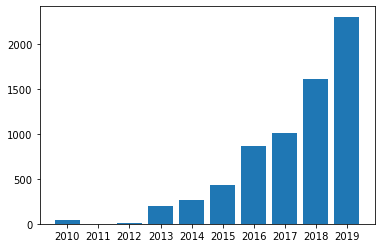

In [138]:
# Bolsonaro

ano2010, ano2011, ano2012, ano2013, ano2014, ano2015, ano2016, ano2017, ano2018, ano2019 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

for i in range(df_bo.shape[0]):
    if df_bo.year[i] == 2010:
        ano2010 = ano2010 + 1
    elif df_bo.year[i] == 2011:
        ano2011 = ano2011 + 1
    elif df_bo.year[i] == 2012:
        ano2012 = ano2012 + 1
    elif df_bo.year[i] == 2013:
        ano2013 = ano2013 + 1
    elif df_bo.year[i] == 2014:
        ano2014 = ano2014 + 1
    elif df_bo.year[i] == 2015:
        ano2015 = ano2015 + 1
    elif df_bo.year[i] == 2016:
        ano2016 = ano2016 + 1
    elif df_bo.year[i] == 2017:
        ano2017 = ano2017 + 1
    elif df_bo.year[i] == 2018:
        ano2018 = ano2018 + 1
    elif df_bo.year[i] == 2019:
        ano2019 = ano2019 + 1

nomes=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
valores=[ano2010, ano2011, ano2012, ano2013, ano2014, ano2015, ano2016, ano2017, ano2018, ano2019]

#c=plt.barh(nomes, valores) # Plota na Horizontal
c=plt.bar(nomes, valores) # Plota na Vertical

plt.show()

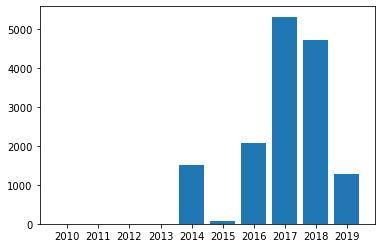

In [139]:
# Lula

ano2010, ano2011, ano2012, ano2013, ano2014, ano2015, ano2016, ano2017, ano2018, ano2019 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

for i in range(df_lu.shape[0]):
    if df_lu.year[i] == 2010:
        ano2010 = ano2010 + 1
    elif df_lu.year[i] == 2011:
        ano2011 = ano2011 + 1
    elif df_lu.year[i] == 2012:
        ano2012 = ano2012 + 1
    elif df_lu.year[i] == 2013:
        ano2013 = ano2013 + 1
    elif df_lu.year[i] == 2014:
        ano2014 = ano2014 + 1
    elif df_lu.year[i] == 2015:
        ano2015 = ano2015 + 1
    elif df_lu.year[i] == 2016:
        ano2016 = ano2016 + 1
    elif df_lu.year[i] == 2017:
        ano2017 = ano2017 + 1
    elif df_lu.year[i] == 2018:
        ano2018 = ano2018 + 1
    elif df_lu.year[i] == 2019:
        ano2019 = ano2019 + 1

nomes=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
valores=[ano2010, ano2011, ano2012, ano2013, ano2014, ano2015, ano2016, ano2017, ano2018, ano2019]

#c=plt.barh(nomes, valores) # Plota na Horizontal
c=plt.bar(nomes, valores) # Plota na Vertical

plt.show()

**Quantiade de Tweets durante as eleições de 2018**

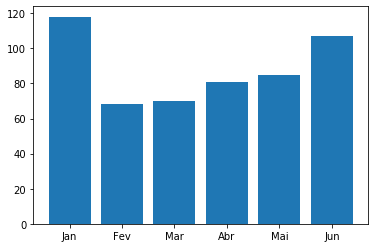

In [140]:
# Bolsonaro

bol = df_bo.loc[(df_bo['year'] == 2018)]

janeiro = bol.loc[(bol['month'] == 1)].month.count()
fevereiro = bol.loc[(bol['month'] == 2)].month.count()
marco = bol.loc[(bol['month'] == 3)].month.count()
abril = bol.loc[(bol['month'] == 4)].month.count()
maio = bol.loc[(bol['month'] == 5)].month.count()
junho = bol.loc[(bol['month'] == 6)].month.count()
julho = bol.loc[(bol['month'] == 7)].month.count()
agosto = bol.loc[(bol['month'] == 8)].month.count()
setembro = bol.loc[(bol['month'] == 9)].month.count()
outubro = bol.loc[(bol['month'] == 10)].month.count()
novembro = bol.loc[(bol['month'] == 11)].month.count()
dezembro = bol.loc[(bol['month'] == 12)].month.count()

nomes=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun']
valores=[janeiro, fevereiro, marco, abril, maio, junho]

#graph=plt.barh(nomes, valores) # Plota na Horizontal
c=plt.bar(nomes, valores) # Plota na Vertical

#plt.show()


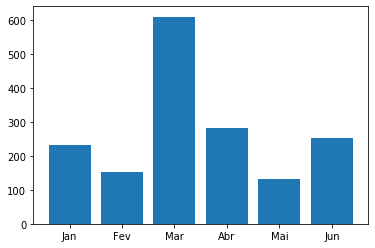

In [141]:
# Lula

lul = df_lu.loc[(df_lu['year'] == 2018)]

janeiro = lul.loc[(lul['month'] == 1)].month.count()
fevereiro = lul.loc[(lul['month'] == 2)].month.count()
marco = lul.loc[(lul['month'] == 3)].month.count()
abril = lul.loc[(lul['month'] == 4)].month.count()
maio = lul.loc[(lul['month'] == 5)].month.count()
junho = lul.loc[(lul['month'] == 6)].month.count()
julho = lul.loc[(lul['month'] == 7)].month.count()
agosto = lul.loc[(lul['month'] == 8)].month.count()
setembro = lul.loc[(lul['month'] == 9)].month.count()
outubro = lul.loc[(lul['month'] == 10)].month.count()
novembro = lul.loc[(lul['month'] == 11)].month.count()
dezembro = lul.loc[(lul['month'] == 12)].month.count()

nomes=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun']
valores=[janeiro, fevereiro, marco, abril, maio, junho]

#graph=plt.barh(nomes, valores) # Plota na Horizontal
c=plt.bar(nomes, valores) # Plota na Vertical

#plt.show()

**7. BIBLIOGRAFIA**

Twetter.Tweet objects. Disponível em: <https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object>, acesso em 30/01/2020.
Pandas Documentation Disponível em :<https://pandas.pydata.org/pandas-docs/stable/index.html>, acesso 31/01/2020.